## EDA y Transformacion de datos
En este notebook se tomaran los archivos json que se encuentran en la carpeta Fuente_json que contienen informacion sobre solana y se les realizaran las transformaciones necesarias y el analisis respectivo, luego de esto los dataframes resultantes se exportaran a archivos .xlsx los cualses quedan almacenados el la carpera Datos_Procesados en la subcarpeta respectiva.

Creacion de dataframe a partir del archivo fuente .json

In [1]:
import json
import pandas as pd

# Cargar el JSON desde el archivo
with open('../Data/Fuente_json/solana/coin_id_solana.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Crear un nuevo diccionario para almacenar los datos no anidados
flat_data = {
    'id': data['id'],
    'symbol': data['symbol'],
    'name': data['name'],
    'block_time_in_minutes': data['block_time_in_minutes'],
    'hashing_algorithm': data['hashing_algorithm'],
    'description': data['description']['en'],
    'homepage': ', '.join(data['links']['homepage']),
    'reddit_subscribers': data['community_data']['reddit_subscribers'],
    'twitter_followers': data['community_data']['twitter_followers'],
    'github_repos': ', '.join(data['links']['repos_url']['github']),
    'last_updated': data['last_updated']
}

# Crear un DataFrame a partir de los datos no anidados
coin_id_solana1 = pd.DataFrame([flat_data])

# Imprimir el DataFrame
print(coin_id_solana1)

       id symbol    name  block_time_in_minutes hashing_algorithm  \
0  solana    sol  Solana                      0              None   

                                         description                 homepage  \
0  \r\nSolana is a highly functional open source ...  https://solana.com/, ,    

   reddit_subscribers  twitter_followers  \
0                   0            2264910   

                            github_repos              last_updated  
0  https://github.com/solana-labs/solana  2023-08-14T05:36:47.772Z  


hay columnas que no aportan valor para la clase de analisis que se va a realizar por lo que se eliminan estas columnas.

In [2]:
#Eliminar columnas
coin_id_solana1.drop(['homepage',"github_repos","last_updated","description"] , axis=1, inplace=True)

In [3]:
print(coin_id_solana1)

       id symbol    name  block_time_in_minutes hashing_algorithm  \
0  solana    sol  Solana                      0              None   

   reddit_subscribers  twitter_followers  
0                   0            2264910  


## grafico
para las categorias de block_time_in_minutes','reddit_subscribers','twitter_followers'

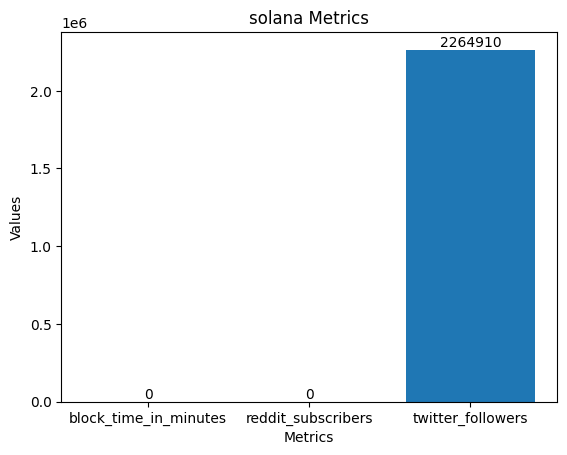

In [4]:
import matplotlib.pyplot as plt

# Datos del DataFrame
data = {
    'block_time_in_minutes': coin_id_solana1['block_time_in_minutes'][0],
    'reddit_subscribers': coin_id_solana1['reddit_subscribers'][0],
    'twitter_followers': coin_id_solana1['twitter_followers'][0]
}

# Crear una figura y ejes
fig, ax = plt.subplots()

# Crear el gráfico de barras
bars = ax.bar(data.keys(), data.values())

# Agregar etiquetas de datos en las barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Configurar el título y etiquetas de los ejes
ax.set_title('solana Metrics')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')

# Mostrar el gráfico
plt.show()

exportacion del dataframe a archivo .xlsx

In [5]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_solana1.to_excel("..\Data\Datos_Procesados/solana\coin_id_solana1.xlsx", sheet_name="coin_id_solana1.xlsx", index=False, float_format="%.2f")

Creacion de dataframe a partir del archivo fuente .json

In [6]:
# Cargar el JSON desde el archivo
with open('..\Data\Fuente_json/solana\coin_id_solana.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Función para aplanar diccionarios anidados
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

# Aplanar los datos anidados del JSON
flattened_data = flatten_dict(data)

# Crear un DataFrame a partir de los datos aplanados
coin_id_solana2 = pd.DataFrame([flattened_data])

# Imprimir el DataFrame
print(coin_id_solana2)

       id symbol    name asset_platform_id platforms_  \
0  solana    sol  Solana              None              

  detail_platforms__decimal_place detail_platforms__contract_address  \
0                            None                                      

   block_time_in_minutes hashing_algorithm  \
0                      0              None   

                                          categories  ...  \
0  [Alleged SEC Securities, Layer 1 (L1), Solana ...  ...   

  developer_data_pull_requests_merged  \
0                               22352   

  developer_data_pull_request_contributors  \
0                                      388   

  developer_data_code_additions_deletions_4_weeks_additions  \
0                                              65432          

  developer_data_code_additions_deletions_4_weeks_deletions  \
0                                             -60780          

  developer_data_commit_count_4_weeks  \
0                                 180   

  developer

In [7]:
coin_id_solana2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 91 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   id                                                         1 non-null      object 
 1   symbol                                                     1 non-null      object 
 2   name                                                       1 non-null      object 
 3   asset_platform_id                                          0 non-null      object 
 4   platforms_                                                 1 non-null      object 
 5   detail_platforms__decimal_place                            0 non-null      object 
 6   detail_platforms__contract_address                         1 non-null      object 
 7   block_time_in_minutes                                      1 non-null      int64  
 8   hashing_algori

Valores faltantes

In [8]:
missing_values = coin_id_solana2.isnull().sum()
print(missing_values)

id                                                    0
symbol                                                0
name                                                  0
asset_platform_id                                     1
platforms_                                            0
                                                     ..
developer_data_last_4_weeks_commit_activity_series    0
public_interest_stats_alexa_rank                      0
public_interest_stats_bing_matches                    1
status_updates                                        0
last_updated                                          0
Length: 91, dtype: int64


Exportar dataframe a archivo .xlsx

In [9]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_solana2.to_excel("..\Data\Datos_Procesados/solana\coin_id_solana2.xlsx", sheet_name="coin_id_solana2.xlsx", index=False, float_format="%.2f")

Creacion de dataframe a partir de archivo fuente .json

In [10]:
with open('..\Data\Fuente_json/solana\coin_id_market_chart_solana.json', 'r') as json_file:
    data = json.load(json_file)

# Crear un DataFrame a partir de los datos JSON
coin_id_market_chart_solana= pd.DataFrame(data)

# Imprimir el DataFrame
print(coin_id_market_chart_solana)


                      prices                          market_caps  \
0      [1586563200000, 0.96]   [1586563200000, 7827651.892659198]   
1      [1586649600000, 0.78]   [1586649600000, 6173607.678345317]   
2      [1586736000000, 0.88]   [1586736000000, 7269680.447445141]   
3      [1586822400000, 0.79]   [1586822400000, 6302364.150584625]   
4      [1586908800000, 0.67]    [1586908800000, 5306221.06575891]   
...                      ...                                  ...   
1217  [1691712000000, 24.62]   [1691712000000, 9982518848.598183]   
1218  [1691798400000, 24.58]   [1691798400000, 9969763672.692484]   
1219  [1691884800000, 24.89]  [1691884800000, 10095650763.649355]   
1220  [1691971200000, 24.22]   [1691971200000, 9839554742.689486]   
1221  [1691994268000, 24.39]   [1691994268000, 9905194061.715559]   

                            total_volumes  
0      [1586563200000, 92672667.43447028]  
1     [1586649600000, 49458692.875223994]  
2     [1586736000000, 37821009.95560235

tratamiento de columnas como listas

In [11]:
# Descomponer las listas en columnas separadas
coin_id_market_chart_solana['timestamp'] = coin_id_market_chart_solana['prices'].apply(lambda x: x[0])
coin_id_market_chart_solana['price'] = coin_id_market_chart_solana['prices'].apply(lambda x: x[1])
coin_id_market_chart_solana['market_cap'] = coin_id_market_chart_solana['market_caps'].apply(lambda x: x[1])
coin_id_market_chart_solana['volume'] = coin_id_market_chart_solana['total_volumes'].apply(lambda x: x[1])

# Convertir los valores a tipos de datos adecuados
coin_id_market_chart_solana['timestamp'] = pd.to_datetime(coin_id_market_chart_solana['timestamp'], unit='ms')
coin_id_market_chart_solana['price'] = pd.to_numeric(coin_id_market_chart_solana['price'])
coin_id_market_chart_solana['market_cap'] = pd.to_numeric(coin_id_market_chart_solana['market_cap'])
coin_id_market_chart_solana['volume'] = pd.to_numeric(coin_id_market_chart_solana['volume'])

# Eliminar las columnas originales de listas
coin_id_market_chart_solana.drop(['prices', 'market_caps', 'total_volumes'], axis=1, inplace=True)

# Mostrar el DataFrame modificado
print(coin_id_market_chart_solana)

               timestamp  price    market_cap        volume
0    2020-04-11 00:00:00   0.96  7.827652e+06  9.267267e+07
1    2020-04-12 00:00:00   0.78  6.173608e+06  4.945869e+07
2    2020-04-13 00:00:00   0.88  7.269680e+06  3.782101e+07
3    2020-04-14 00:00:00   0.79  6.302364e+06  1.957921e+07
4    2020-04-15 00:00:00   0.67  5.306221e+06  1.752353e+07
...                  ...    ...           ...           ...
1217 2023-08-11 00:00:00  24.62  9.982519e+09  3.521246e+08
1218 2023-08-12 00:00:00  24.58  9.969764e+09  3.378071e+08
1219 2023-08-13 00:00:00  24.89  1.009565e+10  2.773069e+08
1220 2023-08-14 00:00:00  24.22  9.839555e+09  2.781821e+08
1221 2023-08-14 06:24:28  24.39  9.905194e+09  3.029998e+08

[1222 rows x 4 columns]


transformacion de datos

In [12]:
# Convertir la columna 'timestamp' a tipo datetime
coin_id_market_chart_solana['timestamp'] = pd.to_datetime(coin_id_market_chart_solana['timestamp'])

# Obtener solo la fecha de la columna 'timestamp'
coin_id_market_chart_solana['timestamp'] = coin_id_market_chart_solana['timestamp'].dt.date

In [13]:
coin_id_market_chart_solana

,timestamp,price,market_cap,volume
0,2020-04-11,0.96,7.827652e+06,9.267267e+07
1,2020-04-12,0.78,6.173608e+06,4.945869e+07
2,2020-04-13,0.88,7.269680e+06,3.782101e+07
3,2020-04-14,0.79,6.302364e+06,1.957921e+07
4,2020-04-15,0.67,5.306221e+06,1.752353e+07
...,...,...,...,...
1217,2023-08-11,24.62,9.982519e+09,3.521246e+08
1218,2023-08-12,24.58,9.969764e+09,3.378071e+08
1219,2023-08-13,24.89,1.009565e+10,2.773069e+08
1220,2023-08-14,24.22,9.839555e+09,2.781821e+08


In [14]:
# cambiar nombre columna
coin_id_market_chart_solana.rename(columns={'timestamp': 'date'}, inplace=True)

In [15]:
print(coin_id_market_chart_solana)

            date  price    market_cap        volume
0     2020-04-11   0.96  7.827652e+06  9.267267e+07
1     2020-04-12   0.78  6.173608e+06  4.945869e+07
2     2020-04-13   0.88  7.269680e+06  3.782101e+07
3     2020-04-14   0.79  6.302364e+06  1.957921e+07
4     2020-04-15   0.67  5.306221e+06  1.752353e+07
...          ...    ...           ...           ...
1217  2023-08-11  24.62  9.982519e+09  3.521246e+08
1218  2023-08-12  24.58  9.969764e+09  3.378071e+08
1219  2023-08-13  24.89  1.009565e+10  2.773069e+08
1220  2023-08-14  24.22  9.839555e+09  2.781821e+08
1221  2023-08-14  24.39  9.905194e+09  3.029998e+08

[1222 rows x 4 columns]


In [16]:
coin_id_market_chart_solana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1222 non-null   object 
 1   price       1222 non-null   float64
 2   market_cap  1222 non-null   float64
 3   volume      1222 non-null   float64
dtypes: float64(3), object(1)
memory usage: 38.3+ KB


## Grafico
para evidenciar outliers

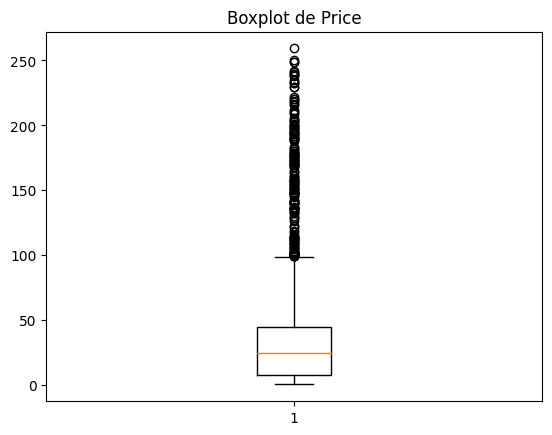

In [17]:
import matplotlib.pyplot as plt
plt.boxplot(coin_id_market_chart_solana['price'])
plt.title('Boxplot de Price')
plt.show()

## Grafico de lineas dobles
para evidenciar como han evolucionado entre si el precio y la capitalizacion del mercado

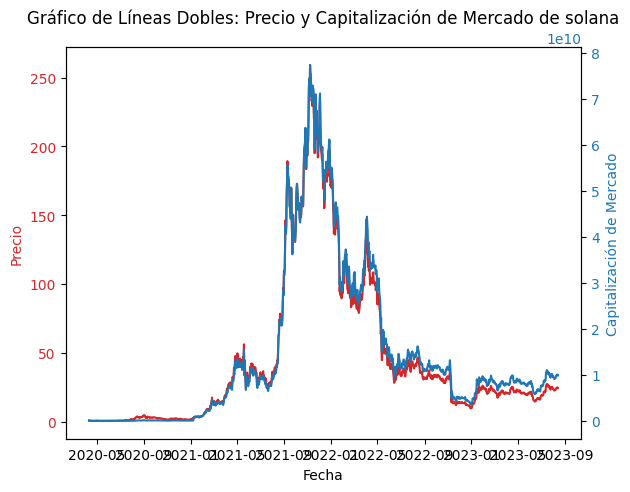

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_solana['date'] = pd.to_datetime(coin_id_market_chart_solana['date'])

# Crear el gráfico de líneas dobles
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio', color=color)
ax1.plot(coin_id_market_chart_solana['date'], coin_id_market_chart_solana['price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Segundo eje y
color = 'tab:blue'
ax2.set_ylabel('Capitalización de Mercado', color=color)
ax2.plot(coin_id_market_chart_solana['date'], coin_id_market_chart_solana['market_cap'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Ajustar el diseño del gráfico
plt.title('Gráfico de Líneas Dobles: Precio y Capitalización de Mercado de solana')
plt.show()

## Gráfico de Retorno Diario
Para calcular los retornos diarios del precio y vizulalizar cómo varían en función de los días.

C:\Users\Gio\AppData\Local\Temp\ipykernel_652\4123862070.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_6_months['daily_return'] = data_last_6_months['price'].pct_change()


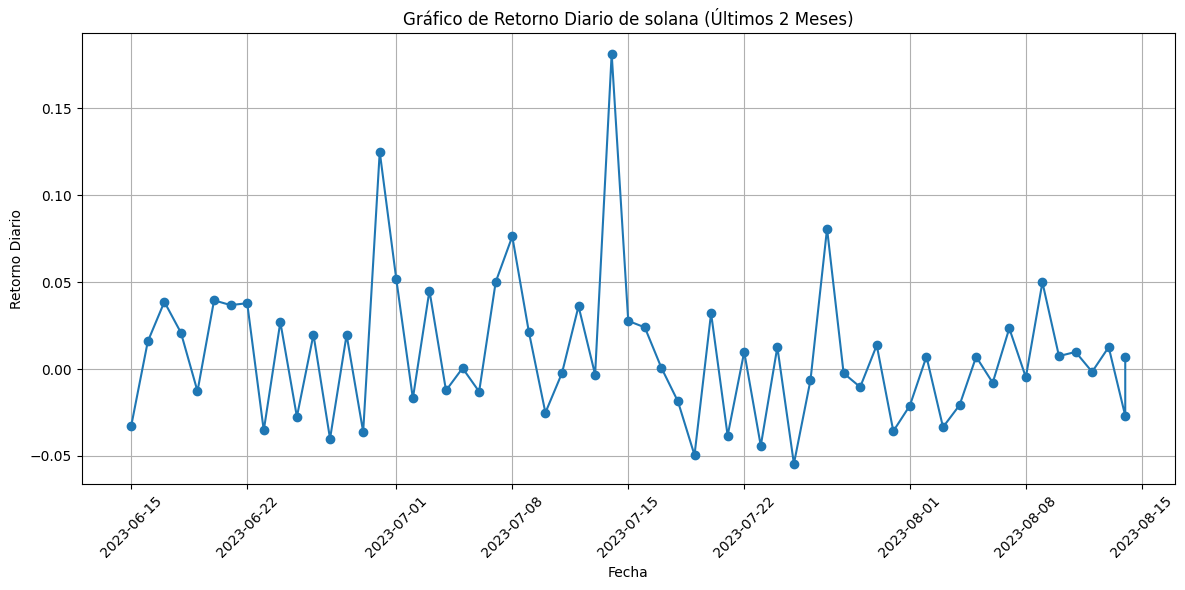

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_solana['date'] = pd.to_datetime(coin_id_market_chart_solana['date'])

# Obtener la fecha actual
current_date = pd.to_datetime('2023-08-14')  # Cambia la fecha a la actual si es necesario

# Calcular la fecha 6 meses antes de la fecha actual
six_months_ago = current_date - pd.DateOffset(months=2)

# Filtrar los datos para los últimos 6 meses
data_last_6_months = coin_id_market_chart_solana[
    (coin_id_market_chart_solana['date'] >= six_months_ago) &
    (coin_id_market_chart_solana['date'] <= current_date)
]

# Calcular los retornos diarios del precio
data_last_6_months['daily_return'] = data_last_6_months['price'].pct_change()

# Crear el gráfico de retorno diario
plt.figure(figsize=(12, 6))
plt.plot(data_last_6_months['date'], data_last_6_months['daily_return'], marker='o')
plt.title('Gráfico de Retorno Diario de solana (Últimos 2 Meses)')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Gráfico de Precios y Volumen
Se combinan dos series de datos en un solo gráfico para ver cómo los precios y el volumen de negociación están relacionados.

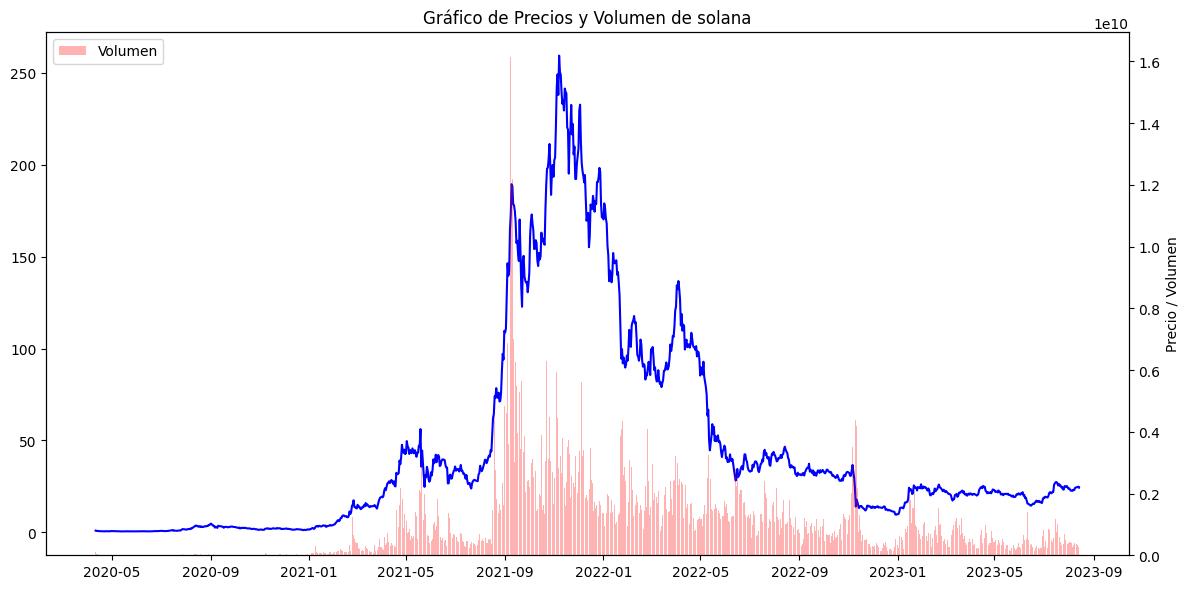

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_solana['date'] = pd.to_datetime(coin_id_market_chart_solana['date'])

# Crear el gráfico de precios y volumen combinados
plt.figure(figsize=(12, 6))

# Gráfico de precios (línea azul)
plt.plot(coin_id_market_chart_solana['date'], coin_id_market_chart_solana['price'], color='blue', label='Precio')

# Crear un segundo eje y para el volumen
plt.gca().twinx()

# Gráfico de volumen (barra roja)
plt.bar(coin_id_market_chart_solana['date'], coin_id_market_chart_solana['volume'], color='red', alpha=0.3, label='Volumen')

plt.title('Gráfico de Precios y Volumen de solana')
plt.xlabel('Fecha')
plt.ylabel('Precio / Volumen')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

In [21]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_market_chart_solana.to_excel("..\Data\Datos_Procesados/solana\coin_id_market_chart_solana.xlsx", sheet_name="coin_id_market_chart_solana.xlsx", index=False, float_format="%.2f")

d:\Programs Instalds\Python\Program Instald\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [22]:
with open('..\Data\Fuente_json/solana\coin_id_ohlc_solana.json', 'r') as json_file:
    data = json.load(json_file)

# Crear un DataFrame a partir de los datos JSON
coin_id_ohlc_solana= pd.DataFrame(data)

# Imprimir el DataFrame
print(coin_id_ohlc_solana)

                 0      1      2      3      4
0    1586563200000   0.96   0.96   0.96   0.96
1    1586908800000   0.78   0.88   0.67   0.67
2    1587254400000   0.64   0.69   0.64   0.68
3    1587600000000   0.61   0.68   0.53   0.68
4    1587945600000   0.62   0.65   0.62   0.64
..             ...    ...    ...    ...    ...
314  1690761600000  25.09  25.17  24.27  24.27
315  1691020800000  23.76  23.93  23.13  23.13
316  1691366400000  22.65  23.16  22.63  23.16
317  1691712000000  23.05  24.62  23.05  24.62
318  1692057600000  24.58  24.89  24.22  24.22

[319 rows x 5 columns]


In [23]:
coin_id_ohlc_solana[0] = pd.to_datetime(coin_id_ohlc_solana[0], unit='ms')

In [24]:
# cambiar nombre columna
coin_id_ohlc_solana.rename(columns={'date': 'Date', 1:'Open', 2:'High', 3:'Low', 4:'Close'}, inplace=True)

In [25]:
coin_id_ohlc_solana

,0,Open,High,Low,Close
0,2020-04-11,0.96,0.96,0.96,0.96
1,2020-04-15,0.78,0.88,0.67,0.67
2,2020-04-19,0.64,0.69,0.64,0.68
3,2020-04-23,0.61,0.68,0.53,0.68
4,2020-04-27,0.62,0.65,0.62,0.64
...,...,...,...,...,...
314,2023-07-31,25.09,25.17,24.27,24.27
315,2023-08-03,23.76,23.93,23.13,23.13
316,2023-08-07,22.65,23.16,22.63,23.16
317,2023-08-11,23.05,24.62,23.05,24.62


In [26]:
coin_id_ohlc_solana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       319 non-null    datetime64[ns]
 1   Open    319 non-null    float64       
 2   High    319 non-null    float64       
 3   Low     319 non-null    float64       
 4   Close   319 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 12.6 KB


In [27]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_ohlc_solana.to_excel("..\Data\Datos_Procesados/solana\coin_id_ohlc_solana.xlsx", sheet_name="coin_id_ohlc_solana.xlsx", index=False, float_format="%.2f")